<h2>Data Loader</h2>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import numpy as np

In [23]:
import os
from scipy.io import loadmat
from scipy.interpolate import interp1d
directory = '../Dataset/Chuong Duong'

all_data = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mat'):
        filepath = os.path.join(directory, filename)
        # Load the .mat file and add its contents to the dictionary
        mat_data = loadmat(filepath)
        
        # Use filename (without extension) as key for the data
        key = os.path.splitext(filename)[0]
        all_data[key] = mat_data['acceleration']
        print(filepath)
        print(mat_data)

../Dataset/Chuong Duong/ChuongDuong5.mat
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug  5 13:22:10 2024', '__version__': '1.0', '__globals__': [], 'acceleration': array([[ 0.00000000e+00, -1.76938762e-05,  1.93218752e-05, ...,
         3.20232276e-05,  3.98200632e-05,  0.00000000e+00],
       [ 0.00000000e+00, -2.74850791e-05,  3.98295374e-05, ...,
         5.82745773e-05,  6.57308542e-05,  0.00000000e+00],
       [ 0.00000000e+00, -3.22212570e-05,  5.97583067e-05, ...,
         7.95689663e-05,  8.19141888e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  9.58576323e-06,  1.43233287e-05, ...,
         3.47126009e-05,  6.43548549e-05,  0.00000000e+00],
       [ 0.00000000e+00,  1.98457594e-05,  2.23331376e-05, ...,
         3.18232324e-05,  4.55212093e-05,  0.00000000e+00],
       [ 0.00000000e+00,  2.54074286e-05,  2.37467243e-05, ...,
         1.95918117e-05,  1.24411731e-05,  0.00000000e+00]])}
../Dataset/Chuong Duong/ChuongDuong8.mat
{'__hea

In [24]:
keys_to_stack = [f'ChuongDuong{i}' for i in range(11)]
input_data = np.stack([all_data[key] for key in keys_to_stack], axis=0)
print(all_data.keys)

# Create the corresponding labels
output_labels = np.linspace(0,10,11)  # Using 0 and 1 as class labels for binary cross-entropy
labels = output_labels

input_data = input_data[:,:,:40000]
input_data.shape, output_labels.shape

<built-in method keys of dict object at 0x7f5b3ab26880>


((11, 40, 40000), (11,))

(40, 40000)


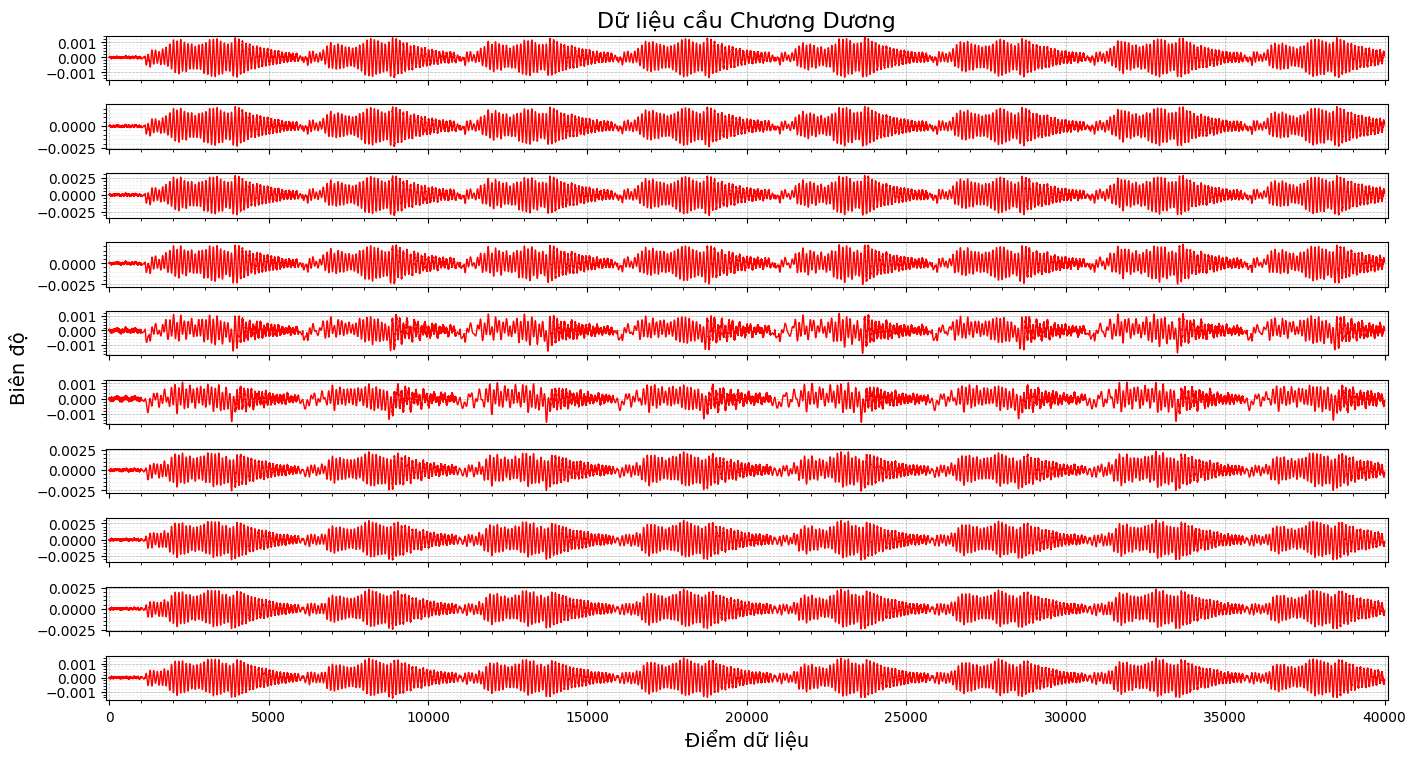

In [25]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = input_data[5, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [26]:

import random

def augment_time_series_data(input_data, labels, num_augmentations=5):
    """
    Augment time series data.

    :param input_data: Original time series data array.
    :param labels: Corresponding labels for the data.
    :param num_augmentations: Number of augmented samples to generate per original sample.

    :return: Augmented data array and corresponding labels.
    """
    augmented_data = []
    augmented_labels = []

    num_samples, num_channels, sequence_length = input_data.shape
    #print (sequence_length)

    for i in range(num_samples):
        for _ in range(num_augmentations):
            # Choose a random augmentation technique
            augmentation_type = random.choice(['noise', 'reverse', 'crop_pad'])

            if augmentation_type == 'noise':
                # Add random noise
                noise = np.random.normal(0, 0.001, input_data[i].shape)
                augmented_sample = input_data[i] + noise

            elif augmentation_type == 'reverse':
                # Reverse the sequence
                augmented_sample = np.flip(input_data[i], axis=-1)

            elif augmentation_type == 'crop_pad':
                # Crop and pad the sequence
                crop_size = random.randint(0, sequence_length // 100)
                padded_sample = np.pad(input_data[i], ((0, 0), (crop_size, 0)), mode='constant', constant_values=0)
                augmented_sample = padded_sample[:, :-crop_size]

            augmented_data.append(augmented_sample)
            augmented_labels.append(labels[i])

    # Convert to numpy arrays
    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    return augmented_data, augmented_labels

# Sử dụng hàm
augmented_data, augmented_labels = augment_time_series_data(input_data, output_labels)
print(augmented_data.shape, augmented_labels.shape)

(55, 40, 40000) (55,)


(40, 40000)


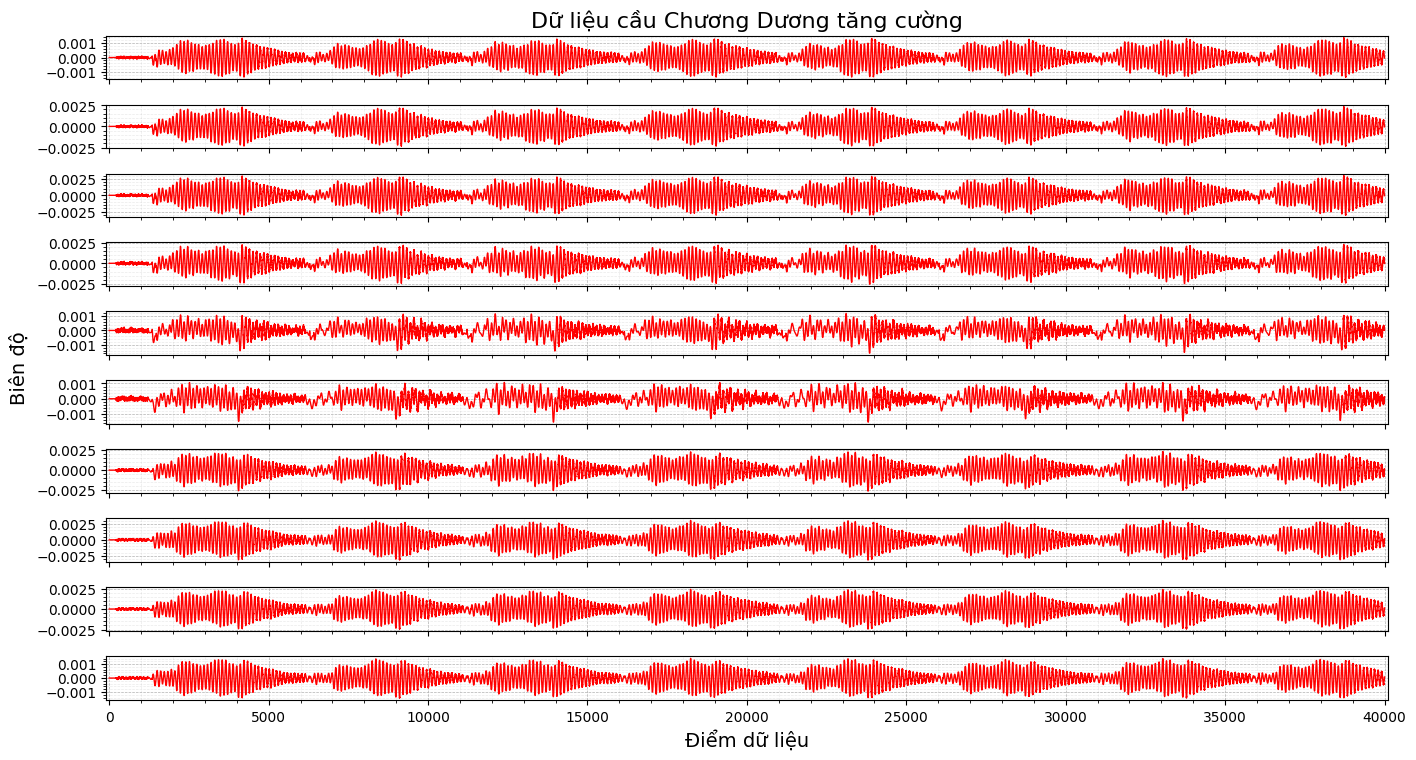

In [27]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = augmented_data[18, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương tăng cường', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [28]:
import numpy as np

def reshape_time_series_data_v8(input_data, label_data, segments_per_new_sample, segment_length):
    """
    Reshape time series data and corresponding labels into a specified shape.

    :param input_data: Original time series data array.
    :param label_data: Corresponding labels for the data.
    :param segments_per_new_sample: Number of segments per new sample.
    :param segment_length: Length of each segment.

    :return: Reshaped data array and corresponding labels.
    """
    num_samples_original, num_channels, length_original = input_data.shape

    # Validate the feasibility of reshaping
    if length_original % segment_length != 0:
        raise ValueError("Segment length must evenly divide the original length.")

    total_segments_per_original_sample = (length_original // segment_length) * num_channels
    num_samples_new = (num_samples_original * total_segments_per_original_sample) // segments_per_new_sample

    # Validate if reshaping is possible
    if (num_samples_original * total_segments_per_original_sample) % segments_per_new_sample != 0:
        raise ValueError("Reshaping not possible with the given dimensions.")

    # Initialize reshaped data and labels
    new_shape = (num_samples_new, segments_per_new_sample, segment_length)
    reshaped_data = np.zeros(new_shape)
    reshaped_labels = np.zeros(num_samples_new)

    # Reshape the data and labels
    count = 0
    for i in range(num_samples_original):
        segment_count = 0
        for j in range(num_channels):
            for k in range(length_original // segment_length):
                start_idx = k * segment_length
                end_idx = start_idx + segment_length
                reshaped_data[count, segment_count % segments_per_new_sample, :] = input_data[i, j, start_idx:end_idx]
                if (segment_count + 1) % segments_per_new_sample == 0:
                    reshaped_labels[count] = label_data[i]  # Assign corresponding label
                    count += 1
                segment_count += 1

    return reshaped_data, reshaped_labels

# Example usage
segments_per_new_sample = 8
segment_length = 5000

# Assume 'augmented_data' and 'augmented_labels' are your input data and labels
reshaped_data, reshaped_labels = reshape_time_series_data_v8(augmented_data, augmented_labels, segments_per_new_sample, segment_length)
print(reshaped_data.shape, reshaped_labels.shape)


(2200, 8, 5000) (2200,)


(8, 5000)


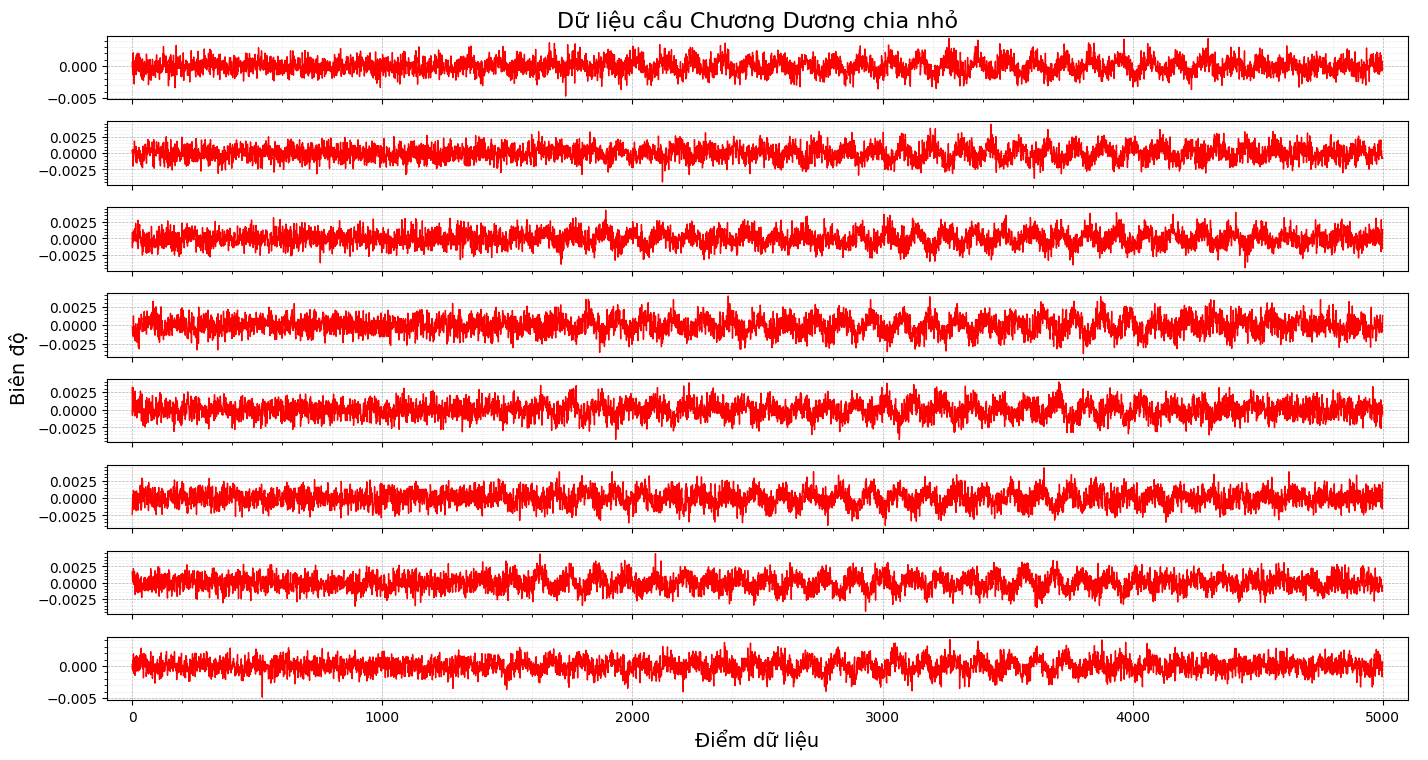

In [29]:

# Select the data at index (1, 1, :) which has a shape of (8000,)
Data = reshaped_data[200, :, :] #150 -> 200
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(reshaped_data.shape[1], 1, figsize=(15, 8), sharex=True)

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'

# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương chia nhỏ', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [30]:

# input_train = reshaped_data
# output_train = reshaped_labels
# XXX_train, XXX_valid, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.4, random_state=42)


# Assuming reshaped_data and reshaped_labels are defined
input_train = reshaped_data  # Original shape is (924, 10, 5000)
output_train = reshaped_labels

# Split the data into training and validation sets
XXX_train_reshaped, XXX_valid_reshaped, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.2, random_state=42)

# Now, reshape XXX_train and XXX_valid from (N, 10, 5000) to (N, 5000, 10)
XXX_train = XXX_train_reshaped.reshape(XXX_train_reshaped.shape[0], 5000, 8)
XXX_valid = XXX_valid_reshaped.reshape(XXX_valid_reshaped.shape[0], 5000, 8)

# Print the shapes to verify
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 5000, 8)
(440, 5000, 8)


In [31]:

# %%
XXX_train = np.reshape(XXX_train, (XXX_train.shape[0], XXX_train.shape[2], XXX_train.shape[1]))
XXX_valid = np.reshape(XXX_valid, (XXX_valid.shape[0], XXX_valid.shape[2], XXX_valid.shape[1]))

# # Transpose dữ liệu
# XXX_train = np.transpose(XXX_train, (0, 2, 1))  # Từ (1760, 8, 5000) sang (1760, 5000, 8)
# XXX_valid = np.transpose(XXX_valid, (0, 2, 1))  # Từ (440, 8, 5000) sang (440, 5000, 8)

label=np.unique(y_train)
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 8, 5000)
(440, 8, 5000)


In [32]:
# Assuming reshaped_data and reshaped_labels are defined
input_train = reshaped_data  # Original shape is (924, 10, 5000)
output_train = reshaped_labels

# Split the data into training and validation sets
XXX_train_reshaped, XXX_valid_reshaped, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.2, random_state=42)

# Now, reshape XXX_train and XXX_valid from (N, 10, 5000) to (N, 5000, 10)
XXX_train = XXX_train_reshaped.reshape(XXX_train_reshaped.shape[0], 5000, 8)
XXX_valid = XXX_valid_reshaped.reshape(XXX_valid_reshaped.shape[0], 5000, 8)

# Print the shapes to verify
print(XXX_train.shape)
print(XXX_valid.shape)

(1760, 5000, 8)
(440, 5000, 8)


In [33]:
# %%
XXX_train = np.reshape(XXX_train, (XXX_train.shape[0], XXX_train.shape[2], XXX_train.shape[1]))
XXX_valid = np.reshape(XXX_valid, (XXX_valid.shape[0], XXX_valid.shape[2], XXX_valid.shape[1]))
label=np.unique(y_train)
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 8, 5000)
(440, 8, 5000)


<h2><i>ResNet34 Model</i><h2>


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import pdb

In [35]:
models.resnet34()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h2><i>Build ResNet34</i><h2>

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

<h3><b>Residual Block</b></h3>


In [37]:
def residual_block(in_channels, out_channels, stride=1):
    """
    Tạo Residual Block cho ResNet-34 1D.
    
    Args:
        in_channels (int): Số kênh đầu vào.
        out_channels (int): Số kênh đầu ra.
        stride (int): Stride cho Conv1d đầu tiên (mặc định: 1).
    
    Returns:
        tuple: (forward, modules) với forward là hàm forward và modules là danh sách nn.Module.
    """
    # Main path
    main_path = nn.Sequential(
        nn.Conv1d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False
        ),
        nn.BatchNorm1d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv1d(
            in_channels=out_channels,
            out_channels=out_channels,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False
        ),
        nn.BatchNorm1d(out_channels)
    )
    
    # Shortcut path
    downsample = None
    if stride != 1 or in_channels != out_channels:
        downsample = nn.Sequential(
            nn.Conv1d(
                in_channels=in_channels,
                out_channels=out_channels,
                kernel_size=1,
                stride=stride,
                bias=False
            ),
            nn.BatchNorm1d(out_channels)
        )
    
    # Hàm forward cho Residual Block
    def forward(x):
        identity = x
        out = main_path(x)
        if downsample is not None:
            identity = downsample(x)
        out += identity
        out = nn.ReLU(inplace=True)(out)
        return out
    
    # Trả về tuple (forward, modules)
    return forward, [main_path] + ([downsample] if downsample is not None else [])

<h3><b>Convolution Block</b></h3>

In [38]:
def conv_block(in_channels=40, out_channels=64, kernel_size=7, stride=2, padding=3):
    """
    Tạo Convolutional Block cho ResNet-34 để xử lý dữ liệu time series 1D.
    """
    return nn.Sequential(
        nn.Conv1d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding,
            bias=False
        ),
        nn.BatchNorm1d(out_channels),
        nn.ReLU(inplace=True),
        nn.MaxPool1d(
            kernel_size=3,
            stride=2,
            padding=1
        )
    )

<h3><b>ResNet34</b></h3>

In [39]:
def resnet34_1d(in_channels=40, num_classes=11):
    """
    Tạo ResNet-34 1D cho dữ liệu time series.
    
    Returns:
        forward: Hàm forward của mô hình.
        modules: Danh sách các nn.Module để quản lý tham số.
    """
    conv1 = conv_block(in_channels=in_channels, out_channels=64)
    
    def make_layer(in_channels, out_channels, num_blocks, stride):
        forward_fns = []
        modules = []
        forward_fn, layer_modules = residual_block(in_channels, out_channels, stride)
        forward_fns.append(forward_fn)
        modules.extend(layer_modules)
        for _ in range(1, num_blocks):
            forward_fn, layer_modules = residual_block(out_channels, out_channels, stride=1)
            forward_fns.append(forward_fn)
            modules.extend(layer_modules)
        return forward_fns, modules
    
    layer1, layer1_modules = make_layer(64, 64, num_blocks=3, stride=1)
    layer2, layer2_modules = make_layer(64, 128, num_blocks=4, stride=2)
    layer3, layer3_modules = make_layer(128, 256, num_blocks=6, stride=2)
    layer4, layer4_modules = make_layer(256, 512, num_blocks=3, stride=2)
    
    avgpool = nn.AdaptiveAvgPool1d(1)
    fc = nn.Linear(512, num_classes)
    
    def forward(x):
        out = conv1(x)
        for block in layer1:
            out = block(out)
        for block in layer2:
            out = block(out)
        for block in layer3:
            out = block(out)
        for block in layer4:
            out = block(out)
        out = avgpool(out)
        out = out.view(out.size(0), -1)
        out = fc(out)
        return out
    
    modules = [conv1] + layer1_modules + layer2_modules + layer3_modules + layer4_modules + [avgpool, fc]
    return forward, modules

<h3><b>Train</b></h3>

In [40]:
import torch
import torch.optim as optim

def train_resnet34_1d(train_data, train_labels, valid_data, valid_labels, num_classes, epochs=10, batch_size=32, learning_rate=0.001, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Huấn luyện mô hình ResNet-34 1D trên dữ liệu time series.
    
    Args:
        train_data (np.ndarray): Shape [352, 40, 40000].
        train_labels (np.ndarray): Shape [352].
        valid_data (np.ndarray): Shape [88, 40, 40000].
        valid_labels (np.ndarray): Shape [88].
        num_classes (int): Số lớp đầu ra.
        epochs (int): Số epoch.
        batch_size (int): Kích thước batch.
        learning_rate (float): Tốc độ học.
        device (str): 'cuda' hoặc 'cpu'.
    
    Returns:
        forward: Hàm forward của mô hình.
        modules: Danh sách các nn.Module đã huấn luyện.
        history: Lịch sử loss và accuracy.
    """
    # Chuyển dữ liệu thành tensor
    train_data = torch.from_numpy(train_data).float()
    train_labels = torch.from_numpy(train_labels).long()
    valid_data = torch.from_numpy(valid_data).float()
    valid_labels = torch.from_numpy(valid_labels).long()
    
    # Tạo DataLoader
    train_dataset = TensorDataset(train_data, train_labels)
    valid_dataset = TensorDataset(valid_data, valid_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
    
    # Tạo mô hình
    forward, modules = resnet34_1d(in_channels=train_data.shape[1], num_classes=num_classes)
    
    # Chuyển các module sang device
    device = torch.device(device)
    for module in modules:
        module.to(device)
    
    # Loss và optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam([param for module in modules for param in module.parameters()], lr=learning_rate)
    
    # Lưu lịch sử
    history = {'train_loss': [], 'train_acc': [], 'valid_loss': [], 'valid_acc': []}
    
    for epoch in range(epochs):
        # Huấn luyện
        train_loss, train_correct, train_total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        train_loss /= train_total
        train_acc = train_correct / train_total
        
        # Đánh giá
        valid_loss, valid_correct, valid_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = forward(inputs)
                loss = criterion(outputs, labels)
                
                valid_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                valid_total += labels.size(0)
                valid_correct += (predicted == labels).sum().item()
        
        valid_loss /= valid_total
        valid_acc = valid_correct / valid_total
        
        # Lưu lịch sử
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['valid_loss'].append(valid_loss)
        history['valid_acc'].append(valid_acc)
        
        # In kết quả
        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}')
    
    return forward, modules, history

In [41]:
def test_resnet34_1d(forward, modules, test_data, test_labels, batch_size=32, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Đánh giá mô hình ResNet-34 1D trên dữ liệu test/validation.
    
    Args:
        forward: Hàm forward của mô hình.
        modules: Danh sách các nn.Module của mô hình.
        test_data (np.ndarray): Shape [88, 40, 40000].
        test_labels (np.ndarray): Shape [88].
        batch_size (int): Kích thước batch.
        device (str): 'cuda' hoặc 'cpu'.
    
    Returns:
        test_loss (float): Loss trên tập test.
        test_acc (float): Accuracy trên tập test.
    """
    # Chuyển dữ liệu thành tensor
    test_data = torch.from_numpy(test_data).float()
    test_labels = torch.from_numpy(test_labels).long()
    
    # Tạo DataLoader
    test_dataset = TensorDataset(test_data, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Chuyển các module sang device
    device = torch.device(device)
    for module in modules:
        module.to(device)
    
    # Đánh giá
    test_loss, test_correct, test_total = 0.0, 0, 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = forward(inputs)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_loss /= test_total
    test_acc = test_correct / test_total
    
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    
    return test_loss, test_acc

In [42]:
XXX_train = np.random.randn(1760, 8, 5000)
y_train = np.random.randint(0, 2, 1760)  # Giả sử 2 lớp
XXX_valid = np.random.randn(440, 8, 5000)
y_valid = np.random.randint(0, 2, 440)

# Xác định số lớp
num_classes = len(np.unique(y_train))

# Huấn luyện mô hình
forward, modules, history = train_resnet34_1d(
    train_data=XXX_train,
    train_labels=y_train,
    valid_data=XXX_valid,
    valid_labels=y_valid,
    num_classes=num_classes,
    epochs=10,
    batch_size=32,
    learning_rate=0.001
)

# Đánh giá mô hình
test_loss, test_acc = test_resnet34_1d(
    forward=forward,
    modules=modules,
    test_data=XXX_valid,
    test_labels=y_valid,
    batch_size=32
)

Epoch 1/10:
Train Loss: 0.7612, Train Acc: 0.5216
Valid Loss: 0.7303, Valid Acc: 0.5000
Epoch 2/10:
Train Loss: 0.6871, Train Acc: 0.5665
Valid Loss: 0.7206, Valid Acc: 0.4705
Epoch 3/10:
Train Loss: 0.6686, Train Acc: 0.5960
Valid Loss: 0.7485, Valid Acc: 0.4705
Epoch 4/10:
Train Loss: 0.5735, Train Acc: 0.7006
Valid Loss: 0.7646, Valid Acc: 0.4886
Epoch 5/10:
Train Loss: 0.4809, Train Acc: 0.7778
Valid Loss: 0.9397, Valid Acc: 0.4932
Epoch 6/10:
Train Loss: 0.2589, Train Acc: 0.8966
Valid Loss: 1.3536, Valid Acc: 0.4841
Epoch 7/10:
Train Loss: 0.1233, Train Acc: 0.9523
Valid Loss: 1.6276, Valid Acc: 0.4727
Epoch 8/10:
Train Loss: 0.2746, Train Acc: 0.8909
Valid Loss: 1.3637, Valid Acc: 0.4864
Epoch 9/10:
Train Loss: 0.2899, Train Acc: 0.8733
Valid Loss: 1.1698, Valid Acc: 0.5273
Epoch 10/10:
Train Loss: 0.1035, Train Acc: 0.9625
Valid Loss: 1.6628, Valid Acc: 0.5182
Test Loss: 1.6628, Test Acc: 0.5182
